In [1]:
# Import required packages
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import mintpy
from mintpy.objects import ifgramStack
from mintpy.utils import plot as pp, utils as ut
from mintpy import view, plot_network
from mintpy.unwrap_error_phase_closure import plot_num_triplet_with_nonzero_integer_ambiguity

ImportError: cannot import name 'plot_num_triplet_with_nonzero_integer_ambiguity' from 'mintpy.unwrap_error_phase_closure' (/home/jovyan/.local/envs/insar_analysis/lib/python3.8/site-packages/mintpy/unwrap_error_phase_closure.py)

In [2]:
os.chdir('/home/jovyan/rmnp_landslide/mintpy')

In [3]:
# Function to write to MintPy config file
def write_config_file(out_file, CONFIG_TXT, mode='a'): 
    """Write configuration files for MintPy to process products"""
    if not os.path.isfile(out_file) or mode == 'w':
        with open(out_file, "w") as fid:
            fid.write(CONFIG_TXT)
        print('write configuration to file: {}'.format(out_file))
    else:
        with open(out_file, "a") as fid:
            fid.write("\n" + CONFIG_TXT)
        print('add the following to file: \n{}'.format(CONFIG_TXT))

In [4]:
CONFIG_TXT = '''# vim: set filetype=cfg:
##----------------------------- hyp3 ---------------------##
mintpy.load.processor        = hyp3
##---------interferogram datasets:
mintpy.load.unwFile          = /Users/qbren/Desktop/taco/projects/rmnp_rockslide/data_crop_small/asc/*/*unw_phase.tif
mintpy.load.corFile          = /Users/qbren/Desktop/taco/projects/rmnp_rockslide/data_crop_small/asc/*/*corr.tif
##---------geometry datasets:
mintpy.load.demFile          = /Users/qbren/Desktop/taco/projects/rmnp_rockslide/data_crop_small/asc/*/*dem.tif
mintpy.load.incAngleFile     = /Users/qbren/Desktop/taco/projects/rmnp_rockslide/data_crop_small/asc/*/*lv_theta.tif
mintpy.load.waterMaskFile    = /Users/qbren/Desktop/taco/projects/rmnp_rockslide/data_crop_small/asc/*/*water_mask.tif

#mintpy.network.excludeDate   =  20150508,20160502,20160526,20150503,20170515,20170527,20180522,20190517,20190529,20200511,20200523,20210506,20210518
mintpy.network.coherenceBased  = yes
mintpy.network.keepMinSpanTree = yes
mintpy.network.minCoherence    = 0.7
mintpy.networkInversion.minTempCoh  = 0.4
mintpy.network.aoiYX           = 4461227:4461539,441967:442275
mintpy.deramp                = linear
mintpy.reference.lalo        = auto
'''

config_file = os.path.join('/Users/qbren/Desktop/taco/projects/rmnp_rockslide/mintpy', "rmnpSenAT151.txt")
write_config_file(config_file, CONFIG_TXT, mode='w')

write configuration to file: /Users/qbren/Desktop/taco/projects/rmnp_rockslide/mintpy\rmnpSenAT151.txt


In [ ]:
# Command line 
# smallbaselineApp.py rmnpSenAT151.txt --dostep load_data
# smallbaselineApp.py rmnpSenAT151.txt --dostep modify_network
# smallbaselineApp.py rmnpSenAT151.txt --dostep reference_point
# smallbaselineApp.py rmnpSenAT151.txt --dostep quick_overview
# smallbaselineApp.py rmnpSenAT151.txt --dostep invert_network
# (NOT FOR MOUNTAINS) smallbaselineApp.py coloradoSenDT56.txt --dostep correct_troposphere
# smallbaselineApp.py rmnpSenAT151.txt --dostep deramp
# smallbaselineApp.py rmnpSenAT151.txt --dostep correct_topography
# smallbaselineApp.py rmnpSenAT151.txt --dostep velocity

run view.py in MintPy version v1.3.3, date 2022-04-14
input file is ifgramStack file: C:\Users\qbren\Desktop\taco\projects\rmnp_rockslide\mintpy\inputs\ifgramStack.h5 in float32 format
file size in y/x: (21, 29)
input dataset: "['20150601_20150625']"
num of datasets in file ifgramStack.h5: 462
num of datasets to exclude: 0
num of datasets to display: 2
data   coverage in y/x: (0, 0, 29, 21)
subset coverage in y/x: (0, 0, 29, 21)
data   coverage in lat/lon: (441560.0, 4461720.0, 442720.0, 4460880.0)
subset coverage in lat/lon: (441560.0, 4461720.0, 442720.0, 4460880.0)
------------------------------------------------------------------------
colormap: viridis
figure title: unwrapPhase
figure size : [15.00, 8.00]
dataset number: 2
row     number: 1
column  number: 3
figure  number: 1
mark interferograms with 'dropIfgram=False' in red colored title
----------------------------------------
Figure 1 - unwrapPhase.png
reading data as a list of 2D matrices ...
[================================

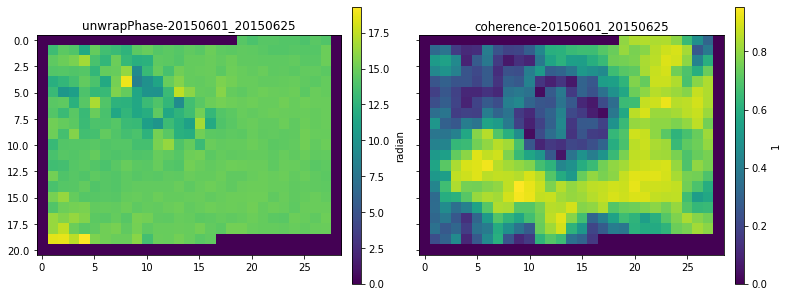

In [5]:
# Plot all data related to one interferometric pair using MintPy plotting utility
view.main('./inputs/ifgramStack.h5 20150601_20150625 --ncols 3 -c viridis'.split())

read temporal/spatial baseline info from file: ./inputs/ifgramStack.h5
open ifgramStack file: ifgramStack.h5
['coherenceSpatialAvg.txt'] exists and is newer than ['./inputs/ifgramStack.h5', 'waterMask.h5'] --> skip.
coherenceSpatialAvg.txt already exists, read it directly
number of acquisitions: 69
number of interferograms: 231
shift all perp baseline by 5.96474027633667 to zero mean for plotting
--------------------------------------------------
number of interferograms marked as drop: 63
number of interferograms marked as keep: 168
number of acquisitions marked as drop: 0
max coherence of excluded interferograms: 0.6961
max perpendicular baseline: 213.30 m
max temporal      baseline: 408.0 days
showing coherence
data range: [0.2371, 0.8908]
display range: (0.2, 1.0)
showing ...


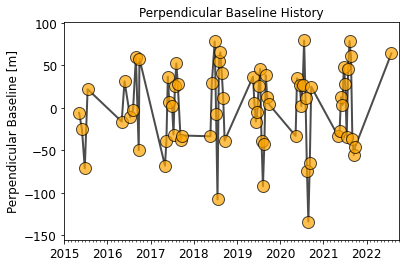

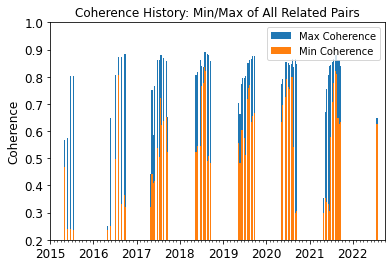

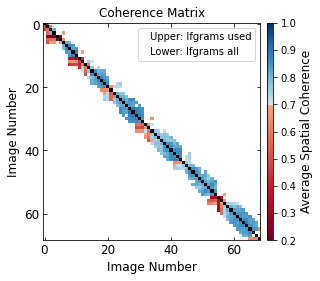

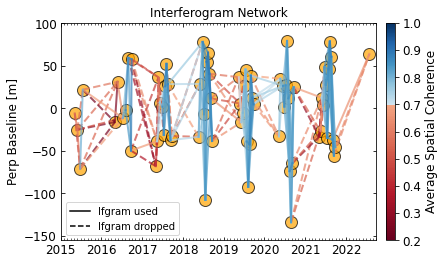

In [6]:
plot_network.main(['./inputs/ifgramStack.h5'])

run view.py in MintPy version v1.3.3, date 2022-04-14
input file is velocity file: C:\Users\qbren\Desktop\taco\projects\rmnp_rockslide\mintpy\avgPhaseVelocity.h5 in float32 format
file size in y/x: (21, 29)
num of datasets in file avgPhaseVelocity.h5: 1
datasets to exclude (0):
[]
datasets to display (1):
['velocity']
data   coverage in y/x: (0, 0, 29, 21)
subset coverage in y/x: (0, 0, 29, 21)
data   coverage in lat/lon: (441560.0, 4461720.0, 442720.0, 4460880.0)
subset coverage in lat/lon: (441560.0, 4461720.0, 442720.0, 4460880.0)
------------------------------------------------------------------------
colormap: RdBu
figure title: avgPhaseVelocity
figure size : [10.00, 5.79]
reading data ...
masking pixels with NO_DATA_VALUE of 0.0
data    range: [5.856152, 8.569007] cm/year
display range: [-10.0, 10.0] cm/year
display data in transparency: 1.0
plot in geo-coordinate
plotting image ...
plot scale bar: [0.2, 0.2, 0.1]
plot reference point
showing ...


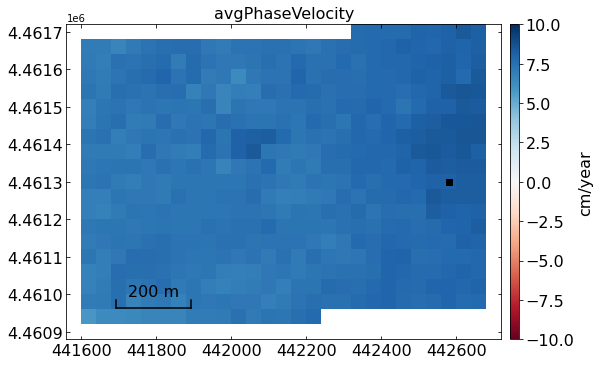

In [7]:
view.main('avgPhaseVelocity.h5 -c RdBu -v -10 10'.split())

plot and save figure to file numTriNonzeroIntAmbiguity.png


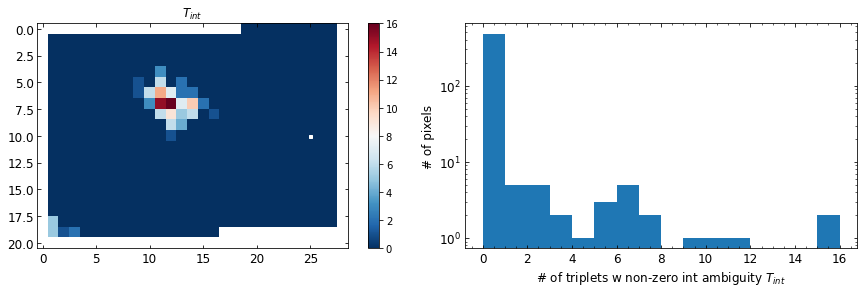

In [8]:
plot_num_triplet_with_nonzero_integer_ambiguity('numTriNonzeroIntAmbiguity.h5', display=True, fig_size=[12, 4])

run view.py in MintPy version v1.3.3, date 2022-04-14
input file is timeseries file: C:\Users\qbren\Desktop\taco\projects\rmnp_rockslide\mintpy\timeseries.h5 in float32 format
file size in y/x: (21, 29)
num of datasets in file timeseries.h5: 69
datasets to exclude (0):
[]
datasets to display (69):
['timeseries-20150508', 'timeseries-20150601', 'timeseries-20150625', 'timeseries-20150719', 'timeseries-20160502', 'timeseries-20160526', 'timeseries-20160713', 'timeseries-20160806', 'timeseries-20160830', 'timeseries-20160923', 'timeseries-20160929', 'timeseries-20170503', 'timeseries-20170515', 'timeseries-20170527', 'timeseries-20170608', 'timeseries-20170702', 'timeseries-20170714', 'timeseries-20170726', 'timeseries-20170807', 'timeseries-20170819', 'timeseries-20170912', 'timeseries-20170924', 'timeseries-20180522', 'timeseries-20180603', 'timeseries-20180627', 'timeseries-20180709', 'timeseries-20180721', 'timeseries-20180802', 'timeseries-20180814', 'timeseries-20180826', 'timeserie

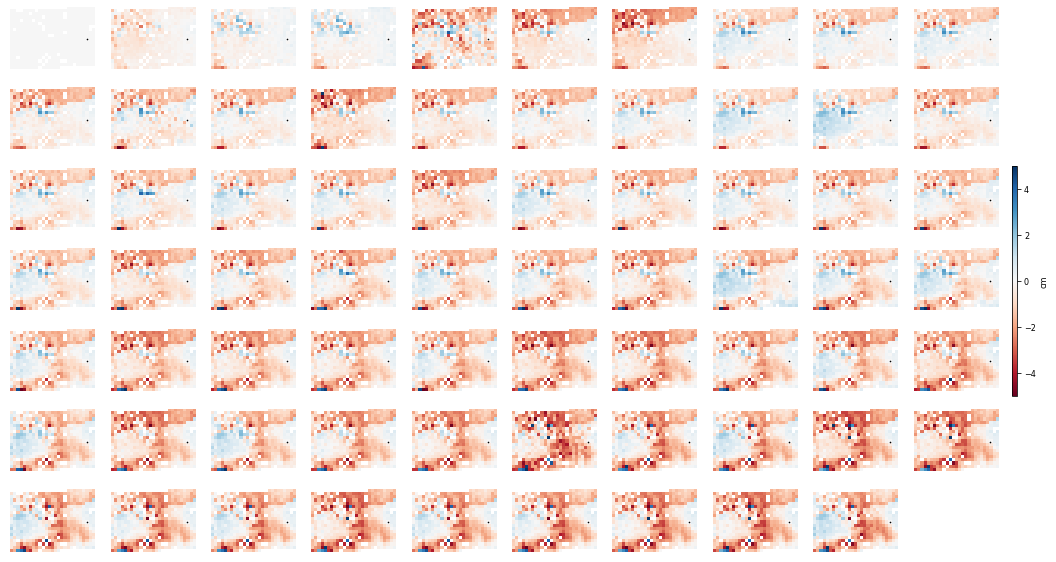

In [9]:
view.main('timeseries.h5 --wrap --wrap-range -5 5 -u cm --notitle --notick --noaxis -c RdBu -v -5 5'.split())

view.py temporalCoherence.h5 -c gray --notick --noaxis --noverbose


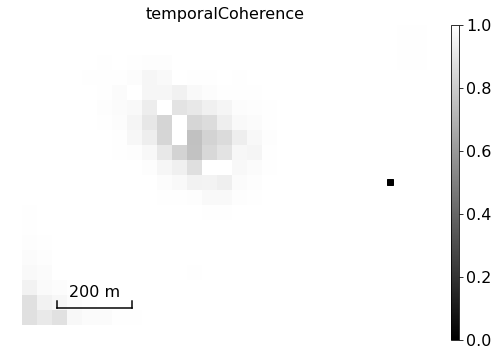

view.py maskTempCoh.h5 -c gray --notick --noaxis --noverbose


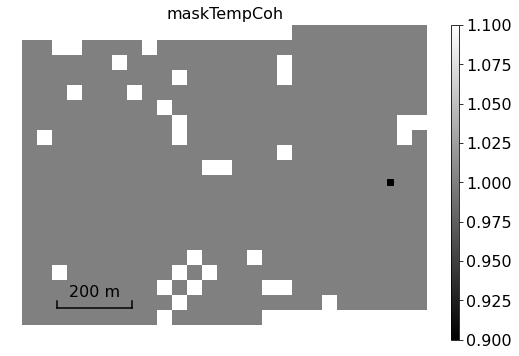

In [10]:
# Plot time series temporal coherence and mask coherence 
view.main('temporalCoherence.h5 -c gray --notick --noaxis --noverbose'.split())
view.main('maskTempCoh.h5 -c gray --notick --noaxis --noverbose'.split())

run view.py in MintPy version v1.3.3, date 2022-04-14
input file is timeseries file: C:\Users\qbren\Desktop\taco\projects\rmnp_rockslide\mintpy\timeseries_ERA5_ramp.h5 in float32 format
file size in y/x: (21, 29)
num of datasets in file timeseries_ERA5_ramp.h5: 69
datasets to exclude (0):
[]
datasets to display (69):
['timeseries-20150508', 'timeseries-20150601', 'timeseries-20150625', 'timeseries-20150719', 'timeseries-20160502', 'timeseries-20160526', 'timeseries-20160713', 'timeseries-20160806', 'timeseries-20160830', 'timeseries-20160923', 'timeseries-20160929', 'timeseries-20170503', 'timeseries-20170515', 'timeseries-20170527', 'timeseries-20170608', 'timeseries-20170702', 'timeseries-20170714', 'timeseries-20170726', 'timeseries-20170807', 'timeseries-20170819', 'timeseries-20170912', 'timeseries-20170924', 'timeseries-20180522', 'timeseries-20180603', 'timeseries-20180627', 'timeseries-20180709', 'timeseries-20180721', 'timeseries-20180802', 'timeseries-20180814', 'timeseries-2

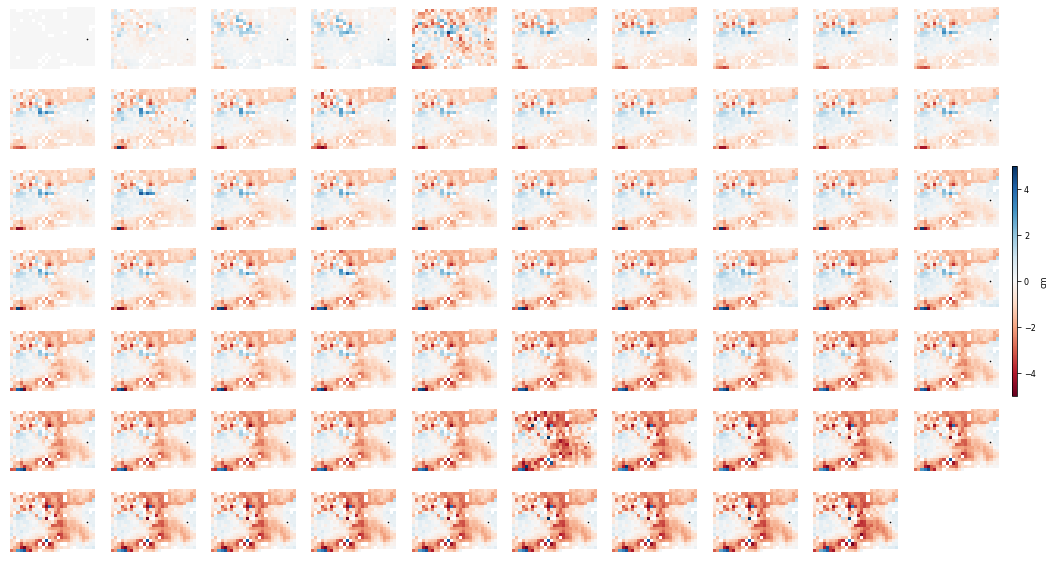

In [11]:
view.main('timeseries_ERA5_ramp.h5 --wrap --wrap-range -5 5 --notitle --notick --noaxis -c RdBu'.split())

run view.py in MintPy version v1.3.3, date 2022-04-14
input file is timeseries file: C:\Users\qbren\Desktop\taco\projects\rmnp_rockslide\mintpy\timeseries_ERA5_ramp_demErr.h5 in float32 format
file size in y/x: (21, 29)
num of datasets in file timeseries_ERA5_ramp_demErr.h5: 69
datasets to exclude (0):
[]
datasets to display (69):
['timeseries-20150508', 'timeseries-20150601', 'timeseries-20150625', 'timeseries-20150719', 'timeseries-20160502', 'timeseries-20160526', 'timeseries-20160713', 'timeseries-20160806', 'timeseries-20160830', 'timeseries-20160923', 'timeseries-20160929', 'timeseries-20170503', 'timeseries-20170515', 'timeseries-20170527', 'timeseries-20170608', 'timeseries-20170702', 'timeseries-20170714', 'timeseries-20170726', 'timeseries-20170807', 'timeseries-20170819', 'timeseries-20170912', 'timeseries-20170924', 'timeseries-20180522', 'timeseries-20180603', 'timeseries-20180627', 'timeseries-20180709', 'timeseries-20180721', 'timeseries-20180802', 'timeseries-20180814',

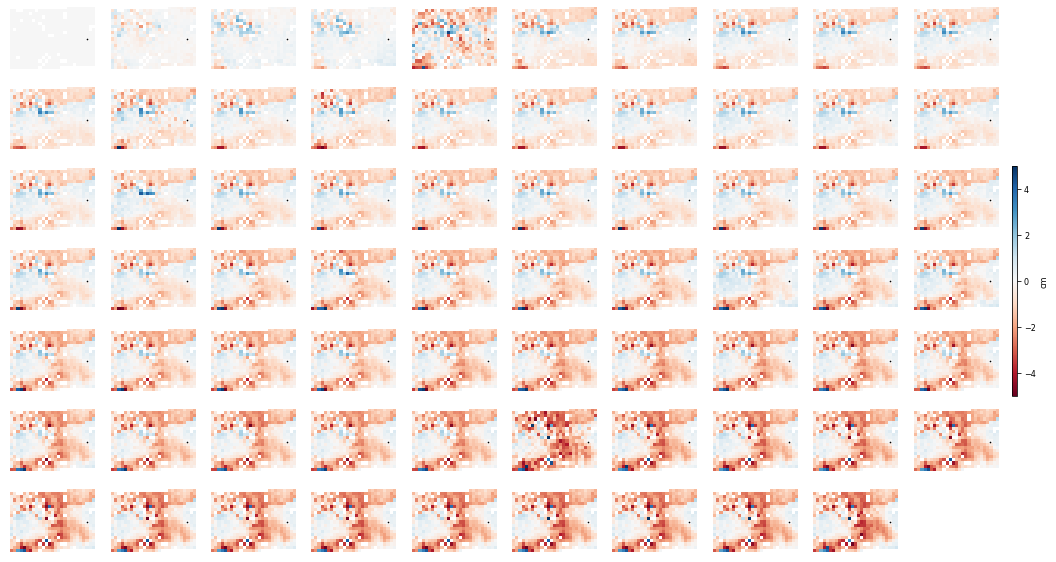

In [12]:
# View DEM error-corrected time series
view.main('timeseries_ERA5_ramp_demErr.h5 --wrap --wrap-range -5 5 --notitle --notick --noaxis -c RdBu'.split())

view.py velocity.h5 --notick --noaxis --noverbose -c RdBu -v -2 2


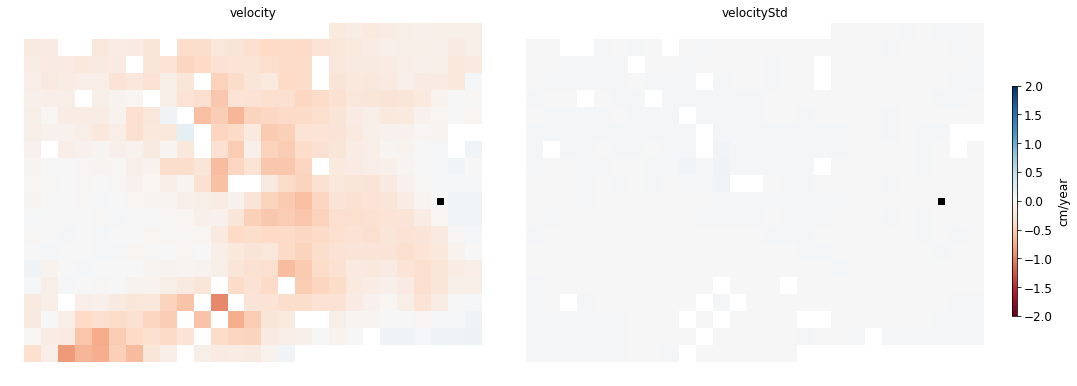

In [13]:
# View original and troposphere corrected velocities
view.main('velocity.h5 --notick --noaxis --noverbose -c RdBu -v -2 2'.split())